In [2]:
!pip install pymssql
!pip install lightgbm
from IPython.core.display import HTML
import subprocess
try:
    import pymssql
    print('imported without install')
except:
    print('importing')
    subprocess.call(['pip','install','pymssql'])
    print('installed')
    print('restarting kernel')
    HTML("<script>Jupyter.notebook.kernel.restart()</script>")
    print('restarted')
    print('importing')
    import pymssql
    print('imported')
    
import getpass
#from blkcore.sso import get_auth_passwd
#from blkdbi.dataobject import DataObject
import pandas as pd
import numpy as np
#from pyhive import hive
import os
from getpass import getuser
#from blkcore import sso
from time import time as current_time
import multiprocessing as mp
import requests
from pandas.io.json import json_normalize
#from blkcore.user import get_user
import importlib
import yaml
import datetime
from pytz import timezone
import boto3
from botocore.config import Config
import glob
import io
import pandas as pd
from pathlib import Path
from pandas.tseries.offsets import MonthEnd
from pandas import util
from datetime import date
from dateutil.relativedelta import relativedelta

imported without install


In [3]:
from numpy import mean
from numpy import std
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from lightgbm import LGBMClassifier
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
from sklearn.metrics import accuracy_score

## Reading in Excel File 

In [4]:
xls = pd.ExcelFile('Team-data-project.xlsx')

In [5]:
Training = pd.read_excel(xls, 'Training')
Testing = pd.read_excel(xls, 'Testing')

In [6]:
Training.head()

,ID,channel,activities_22,activities_21,activities_20,latest_activity,latest_hqa,HQAs_22,HQAs_21,HQAs_20,...,"('webinars_attended', 2022)","('web_visits', 2020)","('web_visits', 2021)","('web_visits', 2022)","('advisor_center_completes', 2020)","('advisor_center_completes', 2021)","('advisor_center_completes', 2022)","('total_ac_portfolios', 2020)","('total_ac_portfolios', 2021)","('total_ac_portfolios', 2022)"
0,0,uswa-emerging-wealth,12,14,4,2022-05-23 12:17:19.780000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,uswa-core-wealth,13,27,31,2022-07-05 00:00:00,2022-06-29 00:00:00,2,2,7,...,0,4,0,0,0,0,0,1,0,0
2,2,uswa-core-wealth,10,20,36,2022-06-08 09:49:51.523000,2021-11-19 00:00:00,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,3,uswa-core-wealth,5,4,28,2022-06-16 00:00:00,2021-05-24 00:00:00,0,2,5,...,0,144,0,0,6,0,0,17,0,0
4,4,uswa-emerging-wealth,18,3,1,2022-07-06 00:00:00,0,0,0,0,...,0,26,0,0,0,0,0,0,0,0


## Writing to CSV

In [5]:
Training.to_csv('training.csv')

In [6]:
Testing.to_csv('testing.csv')

In [43]:
Training.head()

,ID,channel,activities_22,activities_21,activities_20,latest_activity,latest_hqa,HQAs_22,HQAs_21,HQAs_20,...,"('webinars_attended', 2022)","('web_visits', 2020)","('web_visits', 2021)","('web_visits', 2022)","('advisor_center_completes', 2020)","('advisor_center_completes', 2021)","('advisor_center_completes', 2022)","('total_ac_portfolios', 2020)","('total_ac_portfolios', 2021)","('total_ac_portfolios', 2022)"
0,0,uswa-emerging-wealth,12,14,4,2022-05-23 12:17:19.780000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,uswa-core-wealth,13,27,31,2022-07-05 00:00:00,2022-06-29 00:00:00,2,2,7,...,0,4,0,0,0,0,0,1,0,0
2,2,uswa-core-wealth,10,20,36,2022-06-08 09:49:51.523000,2021-11-19 00:00:00,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,3,uswa-core-wealth,5,4,28,2022-06-16 00:00:00,2021-05-24 00:00:00,0,2,5,...,0,144,0,0,6,0,0,17,0,0
4,4,uswa-emerging-wealth,18,3,1,2022-07-06 00:00:00,0,0,0,0,...,0,26,0,0,0,0,0,0,0,0


## Calling LGBM

In [1]:
#X, y = make_classification(n_samples=10000, random_state=7)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = .75)


NameError: name 'train_test_split' is not defined

In [27]:
%%time
model = LGBMClassifier()
model.fit(X_train, y_train)

CPU times: user 35min 51s, sys: 9.96 s, total: 36min 1s
Wall time: 2min 16s


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.1, max_depth=-1,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
        random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [28]:
y_pred = model.predict(X_test)

In [31]:
accuracy=accuracy_score(y_pred, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

LightGBM Model accuracy score: 0.9132


In [33]:
y_pred_train = model.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))


Training-set accuracy score: 0.9805


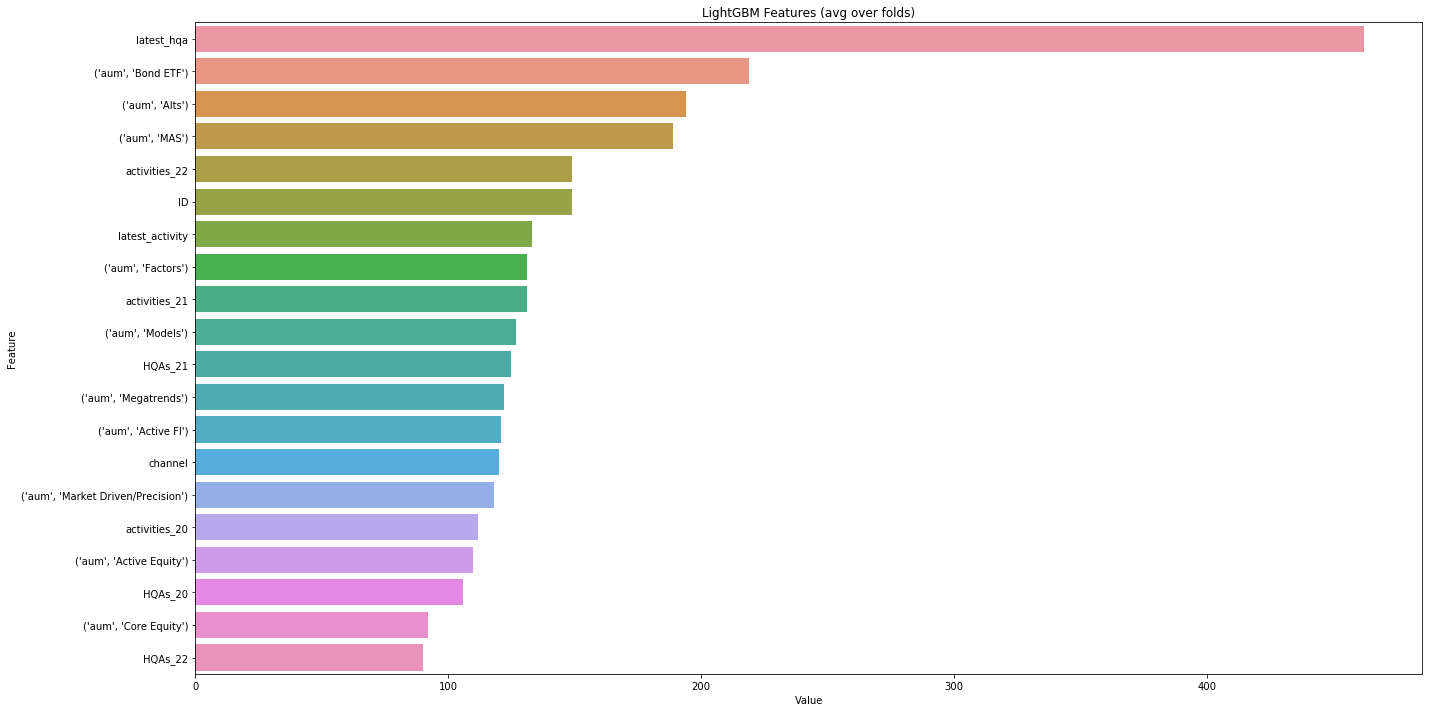

In [41]:
feature_imp = pd.DataFrame(sorted(zip(model.feature_importances_,Training.columns)), columns=['Value','Feature'])
feature_imp
plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()
plt.show()

## Calling Random Forest Classifier

In [8]:
#X, y = make_classification(n_samples=10000, random_state=7)
X = Training.drop('channel', axis = 1)
y = Training['channel']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = .75)


/usr/local/Anaconda3-5.3.1-Linux-x86_64/envs/jupyter-atp/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [47]:
print(X.dtypes)
#display(X)

ID                                     int64
activities_22                          int64
activities_21                          int64
activities_20                          int64
latest_activity                       object
latest_hqa                            object
HQAs_22                                int64
HQAs_21                                int64
HQAs_20                                int64
('aum', 'Active Equity')               int64
('aum', 'Active FI')                   int64
('aum', 'Alts')                        int64
('aum', 'Bond ETF')                    int64
('aum', 'Core Equity')                 int64
('aum', 'Factors')                     int64
('aum', 'MAS')                         int64
('aum', 'Market Driven/Precision')     int64
('aum', 'Megatrends')                  int64
('aum', 'Models')                      int64
('aum', 'Sustainable')                 int64
mkt_emails_clicked 2020                int64
mkt_emails_opened 2020                 int64
mkt_emails

In [45]:
pd.set_option('max_columns', None)
display(X)

,ID,activities_22,activities_21,activities_20,latest_activity,latest_hqa,HQAs_22,HQAs_21,HQAs_20,"('aum', 'Active Equity')","('aum', 'Active FI')","('aum', 'Alts')","('aum', 'Bond ETF')","('aum', 'Core Equity')","('aum', 'Factors')","('aum', 'MAS')","('aum', 'Market Driven/Precision')","('aum', 'Megatrends')","('aum', 'Models')","('aum', 'Sustainable')",mkt_emails_clicked 2020,mkt_emails_opened 2020,mkt_emails_sent 2020,mkt_emails_clicked 2021,mkt_emails_opened 2021,mkt_emails_sent 2021,mkt_emails_clicked 2022,mkt_emails_opened 2022,mkt_emails_sent 2022,"('events_attended', 2020)","('events_attended', 2021)","('events_attended', 2022)","('webinars_attended', 2020)","('webinars_attended', 2021)","('webinars_attended', 2022)","('web_visits', 2020)","('web_visits', 2021)","('web_visits', 2022)","('advisor_center_completes', 2020)","('advisor_center_completes', 2021)","('advisor_center_completes', 2022)","('total_ac_portfolios', 2020)","('total_ac_portfolios', 2021)","('total_ac_portfolios', 2022)"
0,0,12,14,4,2022-05-23 12:17:19.780000,0,0,0,0,595598,2559461,0,47806,1795,0,0,119720,0,0,0,0,1,83,0,1,8,0,0,14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,13,27,31,2022-07-05 00:00:00,2022-06-29 00:00:00,2,2,7,1373055,4093799,16683,0,0,0,50780,0,0,0,116954,0,0,1,0,4,9,0,3,5,0,0,0,0,0,0,4,0,0,0,0,0,1,0,0
2,2,10,20,36,2022-06-08 09:49:51.523000,2021-11-19 00:00:00,0,1,0,110673,469559,1917,1768400,703619,201353,36683,2278810,0,0,3589,0,0,0,0,0,3,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,5,4,28,2022-06-16 00:00:00,2021-05-24 00:00:00,0,2,5,0,3235417,0,0,0,0,0,0,0,0,0,4,9,104,0,0,50,1,2,45,0,0,0,4,0,0,144,0,0,6,0,0,17,0,0
4,4,18,3,1,2022-07-06 00:00:00,0,0,0,0,70137,118597,0,116534,204178,108822,28134,265167,0,0,0,0,2,93,0,0,26,1,1,13,0,0,0,0,0,0,26,0,0,0,0,0,0,0,0
5,5,26,10,12,2022-06-30 15:47:32.057000,2021-10-25 00:00:00,0,4,0,56046,239018,172002,76700,184086,7253,77888,1076085,0,0,132,0,0,18,0,0,19,0,0,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,6,15,25,23,2022-06-30 09:14:20.040000,2022-05-18 00:00:00,1,3,6,350050,1429298,0,149723,4345207,197906,728650,1341912,23117,0,0,0,3,3,0,3,9,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,7,0,6,0,2021-11-30 00:00:00,0,0,0,0,0,0,0,985643,818874,42530,0,541499,42340,0,0,1,6,45,0,18,43,0,10,16,0,0,0,0,0,0,39,98,4,0,1,0,0,0,0
8,8,7,9,14,2022-06-03 03:00:00,2022-06-03 03:00:00,1,0,3,5459,431381,5357,0,0,0,135155,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,9,4,22,7,2022-05-03 17:16:50.543000,2019-11-06 00:00:00,0,0,0,67804,11660,0,144601,78223,1632,5348,153788,0,0,24998,0,0,0,0,0,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [29]:
X = X.astype({"('aum', 'Active Equity')" : 'int64', 
              "('aum', 'Active Equity')" : 'int64', 
              "('aum', 'Active FI')" : 'int64', 
              "('aum', 'Alts')" : 'int64',
              "('aum', 'Bond ETF')":'int64',
              "('aum', 'Core Equity')": 'int64',
              "('aum', 'Factors')": 'int64',
              "('aum', 'MAS')": 'int64',
              "('aum', 'Market Driven/Precision')" : 'int64',
              "('aum', 'Megatrends')" : 'int64',
              "('aum', 'Models')" : 'int64',
              "('aum', 'Sustainable')":'int64'})

In [33]:
fromDate = min(X['latest_activity'])
X['time_delta'] = (X['latest_activity'] - fromDate).dt.days.astype(int)
print(X[['timestamp', 'timedelta']].head())

TypeError: '<' not supported between instances of 'int' and 'datetime.datetime'

In [42]:
X['latest_activity'] = X['latest_activity'].to_pydatetime()
display(X)

AttributeError: 'Series' object has no attribute 'to_pydatetime'

In [32]:
forest = RandomForestClassifier()
forest.fit(X_train, y_train)

/usr/local/Anaconda3-5.3.1-Linux-x86_64/envs/jupyter-atp/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


TypeError: float() argument must be a string or a number, not 'datetime.datetime'

In [50]:
y_pred = forest.predict(X_test)
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Accuracy: 0.897
